In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
kpopgroups= pd.read_csv("kpop_groups.csv")
df = kpopgroups.copy()
df

,Unnamed: 0,danceability,energy,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,loudness,mode,duration_ms,time_signature,artist_name,release_date,song_name,song_name_formatted
0,0,0.566,0.716,1,0.0424,0.00691,0.000000,0.3700,0.450,81.068,-5.733,1,207481,4,BTS,2020-11-20,Life Goes On,life-goes-on
1,1,0.764,0.526,11,0.2120,0.04840,0.000000,0.0718,0.588,114.910,-7.355,1,222243,4,BTS,2020-11-20,Fly To My Room,fly-to-my-room
2,2,0.547,0.605,8,0.0415,0.42000,0.000000,0.1250,0.364,121.953,-6.755,1,254950,4,BTS,2020-11-20,Blue & Grey,blue-grey
3,3,0.703,0.321,4,0.8840,0.86400,0.000000,0.9080,0.544,114.822,-13.135,1,179548,4,BTS,2020-11-20,Skit,skit
4,4,0.787,0.669,5,0.0428,0.00782,0.000000,0.1230,0.570,104.994,-4.333,0,202313,4,BTS,2020-11-20,Telepathy,telepathy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5979,5979,0.745,0.951,5,0.0527,0.04280,0.003860,0.2030,0.606,127.945,-2.425,1,200303,4,ITZY,2019-02-14,WANT IT?,want
5980,5980,0.790,0.853,11,0.0665,0.00116,0.000042,0.3290,0.713,124.998,-4.564,0,199874,4,ITZY,2019-02-12,달라달라 (DALLA DALLA),NaN
5981,5981,0.745,0.951,5,0.0527,0.04280,0.003860,0.2030,0.606,127.957,-2.425,1,200303,4,ITZY,2019-02-12,WANT IT?,want
5982,5982,0.790,0.853,11,0.0666,0.00116,0.000042,0.3290,0.713,125.000,-4.564,0,199874,4,ITZY,2019-02-12,달라달라 (DALLA DALLA),NaN


In [4]:
year = df["release_date"].apply(lambda x: x.split('-')[0])
df.insert(15,"year",year)

In [5]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['artist_name'] = [i.lower().replace("'", '') for i in df.artist_name]

In [6]:
df = df.drop(columns=["Unnamed: 0"])
df

,danceability,energy,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,loudness,mode,duration_ms,time_signature,artist_name,year,release_date,song_name,song_name_formatted
0,0.566,0.716,1,0.0424,0.00691,0.000000,0.3700,0.450,81.068,-5.733,1,207481,4,bts,2020,2020-11-20,Life Goes On,life-goes-on
1,0.764,0.526,11,0.2120,0.04840,0.000000,0.0718,0.588,114.910,-7.355,1,222243,4,bts,2020,2020-11-20,Fly To My Room,fly-to-my-room
2,0.547,0.605,8,0.0415,0.42000,0.000000,0.1250,0.364,121.953,-6.755,1,254950,4,bts,2020,2020-11-20,Blue & Grey,blue-grey
3,0.703,0.321,4,0.8840,0.86400,0.000000,0.9080,0.544,114.822,-13.135,1,179548,4,bts,2020,2020-11-20,Skit,skit
4,0.787,0.669,5,0.0428,0.00782,0.000000,0.1230,0.570,104.994,-4.333,0,202313,4,bts,2020,2020-11-20,Telepathy,telepathy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5979,0.745,0.951,5,0.0527,0.04280,0.003860,0.2030,0.606,127.945,-2.425,1,200303,4,itzy,2019,2019-02-14,WANT IT?,want
5980,0.790,0.853,11,0.0665,0.00116,0.000042,0.3290,0.713,124.998,-4.564,0,199874,4,itzy,2019,2019-02-12,달라달라 (DALLA DALLA),NaN
5981,0.745,0.951,5,0.0527,0.04280,0.003860,0.2030,0.606,127.957,-2.425,1,200303,4,itzy,2019,2019-02-12,WANT IT?,want
5982,0.790,0.853,11,0.0666,0.00116,0.000042,0.3290,0.713,125.000,-4.564,0,199874,4,itzy,2019,2019-02-12,달라달라 (DALLA DALLA),NaN


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,5984.0,0.653703,0.123452,0.000000,0.582000,0.6690,0.739000,0.958
energy,5984.0,0.759343,0.161465,0.002770,0.681750,0.8030,0.876000,0.995
key,5984.0,5.380515,3.543256,0.000000,2.000000,6.0000,8.000000,11.000
speechiness,5984.0,0.096219,0.089620,0.000000,0.043200,0.0662,0.113000,0.936
acousticness,5984.0,0.180083,0.215273,0.000005,0.027475,0.0933,0.244250,0.995
instrumentalness,5984.0,0.042525,0.177240,0.000000,0.000000,0.0000,0.000002,0.965
liveness,5984.0,0.225994,0.200193,0.010800,0.094175,0.1440,0.306000,0.980
valence,5984.0,0.550064,0.207912,0.000000,0.390000,0.5590,0.710250,0.978
tempo,5984.0,121.608275,25.732910,0.000000,102.728000,120.0715,136.072750,216.146
loudness,5984.0,-4.741049,2.302029,-27.191000,-5.527000,-4.4100,-3.278500,0.039


In [8]:
df.columns

Index(['danceability', 'energy', 'key', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'loudness', 'mode',
       'duration_ms', 'time_signature', 'artist_name', 'year', 'release_date',
       'song_name', 'song_name_formatted'],
      dtype='object')

In [9]:
df.isnull().sum()

danceability             0
energy                   0
key                      0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
loudness                 0
mode                     0
duration_ms              0
time_signature           0
artist_name              0
year                     0
release_date             0
song_name                0
song_name_formatted    675
dtype: int64

In [10]:
df.artist_name.value_counts()

bts                 994
blackpink           502
winner              500
girls generation    494
exo                 418
twice               410
nct 127             369
got7                360
red velvet          300
stray kids          273
gfriend             270
monsta x            265
mamamoo             236
exid                187
astro               163
itzy                155
everglow             51
wanna one            37
Name: artist_name, dtype: int64

In [11]:
key_mapping = {0: 'C', 1: 'C♯,D♭', 2: 'D', 3: 'D♯,E♭', 4: 'E', 5: 'F', 6: 'F♯,G♭', 7: 'G', 8: 'G♯,A♭', 9: 'A', 10: 'A♯,B♭', 11: 'B'}
df['key'] = df['key'].map(key_mapping)
df["key"].head()

0    C♯,D♭
1        B
2    G♯,A♭
3        E
4        F
Name: key, dtype: object

In [12]:
time_mapping = {0:'0/4', 1: '1/4', 2: '2/4', 3: '3/4', 4: '4/4', 5: '5/4'}
df["time_signature"] = df['time_signature'].map(time_mapping)
df["time_signature"].head()

0    4/4
1    4/4
2    4/4
3    4/4
4    4/4
Name: time_signature, dtype: object

In [13]:
df.head()

,danceability,energy,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,loudness,mode,duration_ms,time_signature,artist_name,year,release_date,song_name,song_name_formatted
0,0.566,0.716,"C♯,D♭",0.0424,0.00691,0.0,0.3700,0.450,81.068,-5.733,1,207481,4/4,bts,2020,2020-11-20,Life Goes On,life-goes-on
1,0.764,0.526,B,0.2120,0.04840,0.0,0.0718,0.588,114.910,-7.355,1,222243,4/4,bts,2020,2020-11-20,Fly To My Room,fly-to-my-room
2,0.547,0.605,"G♯,A♭",0.0415,0.42000,0.0,0.1250,0.364,121.953,-6.755,1,254950,4/4,bts,2020,2020-11-20,Blue & Grey,blue-grey
3,0.703,0.321,E,0.8840,0.86400,0.0,0.9080,0.544,114.822,-13.135,1,179548,4/4,bts,2020,2020-11-20,Skit,skit
4,0.787,0.669,F,0.0428,0.00782,0.0,0.1230,0.570,104.994,-4.333,0,202313,4/4,bts,2020,2020-11-20,Telepathy,telepathy


C:\Users\HILAL-PC\AppData\Local\Temp/ipykernel_19976/3006639004.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  table.mean().plot.barh().set_title("Average values of songs of popular k-pop groups");
C:\Users\HILAL-PC\AppData\Local\Temp/ipykernel_19976/3006639004.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  table.mean().plot.barh().set_title("Average values of songs of popular k-pop groups");


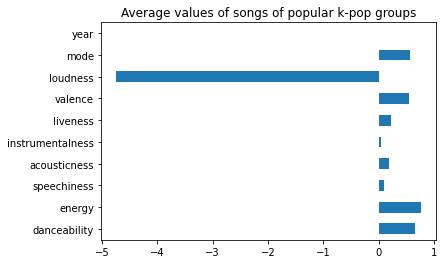

In [14]:
table = df.drop(["duration_ms","tempo"], axis=1)
table.mean().plot.barh().set_title("Average values of songs of popular k-pop groups");

C:\Users\HILAL-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


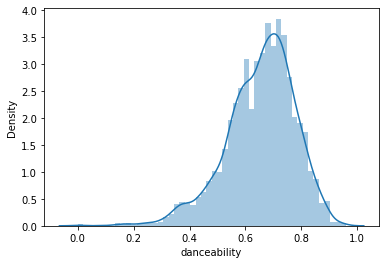

In [15]:
sns.distplot(df['danceability']);

C:\Users\HILAL-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


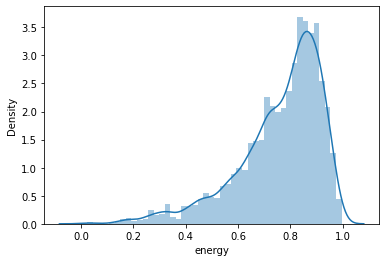

In [16]:
sns.distplot(df['energy']);

C:\Users\HILAL-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


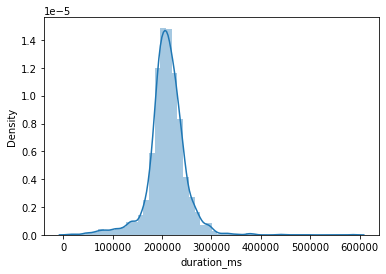

In [17]:
sns.distplot(df['duration_ms']);

C:\Users\HILAL-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


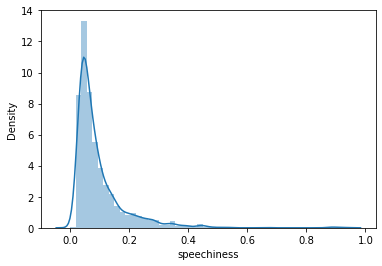

In [18]:
sns.distplot(df['speechiness']);

C:\Users\HILAL-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


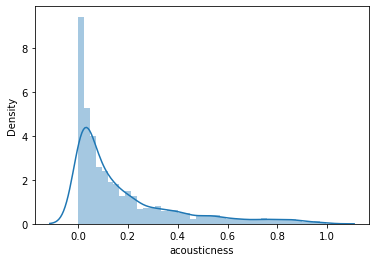

In [19]:
sns.distplot(df['acousticness']);

C:\Users\HILAL-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


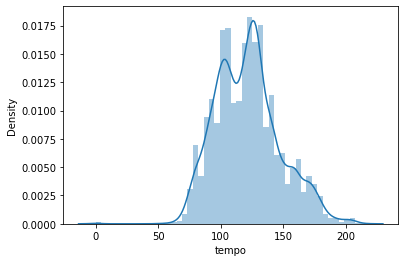

In [20]:
sns.distplot(df['tempo']);

C:\Users\HILAL-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


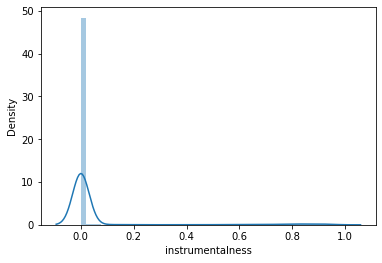

In [21]:
sns.distplot(df['instrumentalness']);

C:\Users\HILAL-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


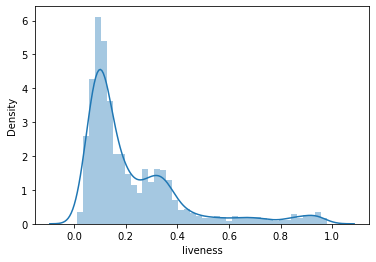

In [22]:
sns.distplot(df['liveness']);

C:\Users\HILAL-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


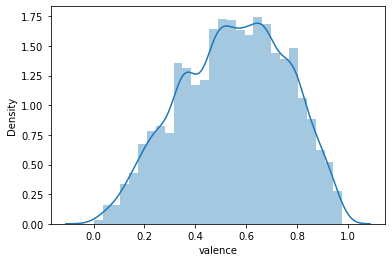

In [23]:
sns.distplot(df['valence']);

C:\Users\HILAL-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


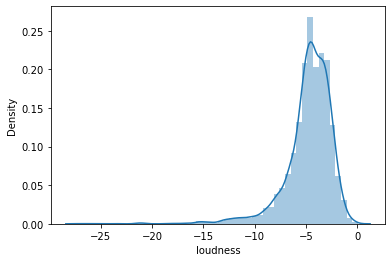

In [24]:
sns.distplot(df['loudness']);

C:\Users\HILAL-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


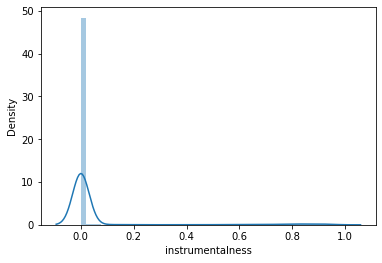

In [25]:
sns.distplot(df['instrumentalness']);

C:\Users\HILAL-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


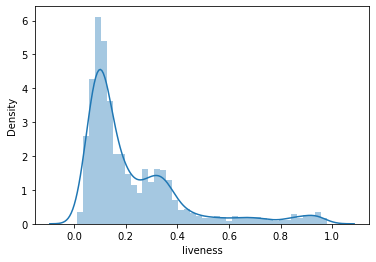

In [26]:
sns.distplot(df['liveness']);

In [27]:
mode_mapping = {1.0: "major", 0.0: "minor"}
df['mode'] = df['mode'].map(mode_mapping)

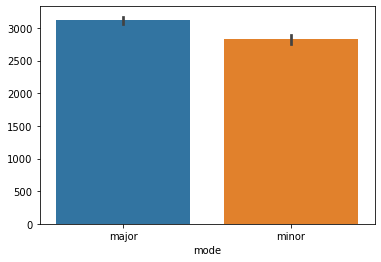

In [28]:
sns.barplot(x="mode", y=df["mode"].index, data=df);

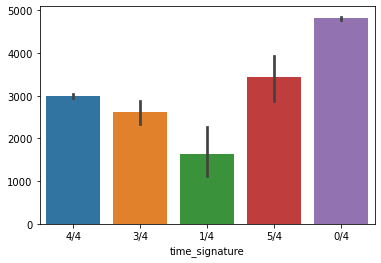

In [29]:
sns.barplot(x="time_signature", y=df["time_signature"].index, data=df);

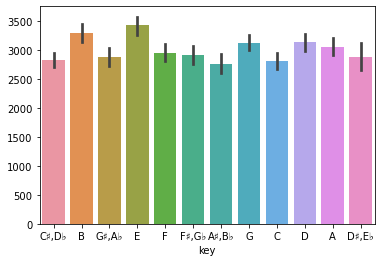

In [30]:
    sns.barplot(x="key", y=df["key"].index, data=df);

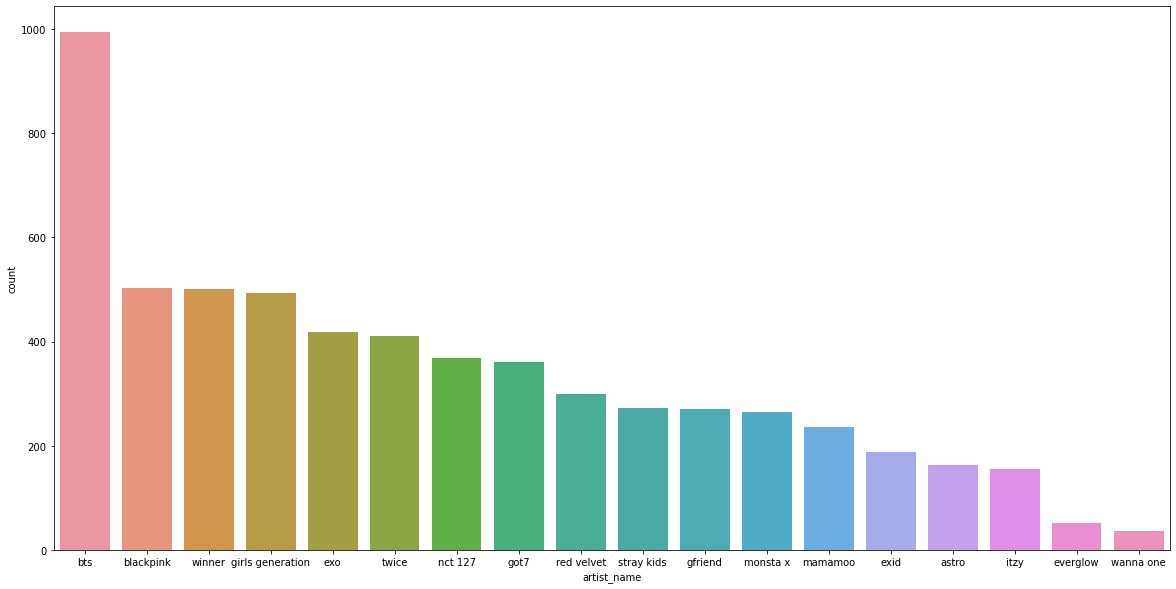

In [31]:
plt.figure(figsize = (20,10))
sns.countplot(x = 'artist_name', data=df, order=df['artist_name'].value_counts().index);

In [32]:
df.corr()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,loudness,duration_ms
danceability,1.000000,0.202751,-0.065743,-0.253472,-0.105600,-0.160284,0.475630,-0.108210,0.233581,-0.127039
energy,0.202751,1.000000,0.113372,-0.590077,-0.250540,0.155644,0.435548,0.096240,0.734630,0.013664
speechiness,-0.065743,0.113372,1.000000,-0.054525,-0.101673,0.104471,0.046202,0.077879,-0.097021,-0.108418
acousticness,-0.253472,-0.590077,-0.054525,1.000000,0.106138,0.009281,-0.234692,-0.065891,-0.416909,0.014307
instrumentalness,-0.105600,-0.250540,-0.101673,0.106138,1.000000,-0.069301,-0.175101,-0.003926,-0.390787,-0.200721
liveness,-0.160284,0.155644,0.104471,0.009281,-0.069301,1.000000,-0.050885,-0.024019,-0.041880,0.028965
valence,0.475630,0.435548,0.046202,-0.234692,-0.175101,-0.050885,1.000000,0.060805,0.393932,-0.080973
tempo,-0.108210,0.096240,0.077879,-0.065891,-0.003926,-0.024019,0.060805,1.000000,0.068626,0.029710
loudness,0.233581,0.734630,-0.097021,-0.416909,-0.390787,-0.041880,0.393932,0.068626,1.000000,0.083923
duration_ms,-0.127039,0.013664,-0.108418,0.014307,-0.200721,0.028965,-0.080973,0.029710,0.083923,1.000000


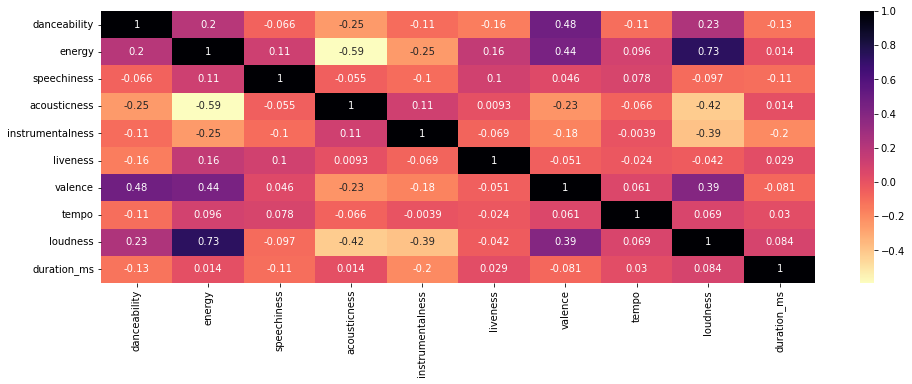

In [33]:
plt.figure(figsize = (16,5))
sns.heatmap(df.corr(), cmap="magma_r", annot=True);

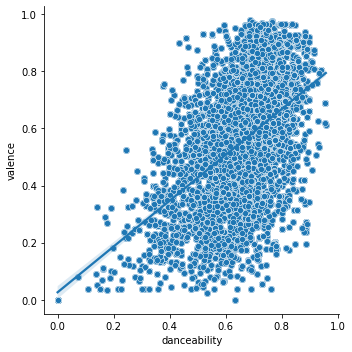

In [34]:
sns.lmplot(x="danceability",y="valence", data=df);
sns.scatterplot(x="danceability",y="valence", data=df);

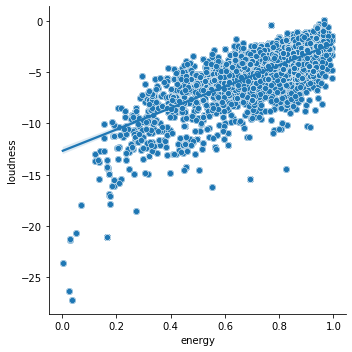

In [35]:
sns.lmplot(x="energy",y="loudness", data=df);
sns.scatterplot(x="energy",y="loudness", data=df);

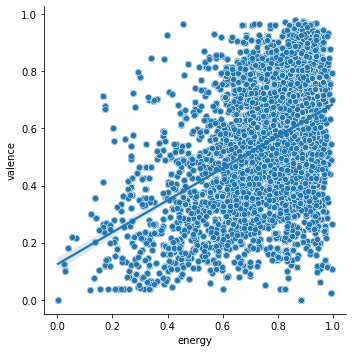

In [36]:
sns.lmplot(x="energy",y="valence", data=df);
sns.scatterplot(x="energy",y="valence", data=df);

In [37]:
df['target'] = [1 if i == 'bts' else 0 for i in df.artist_name]
df["target"]

0       1
1       1
2       1
3       1
4       1
       ..
5979    0
5980    0
5981    0
5982    0
5983    0
Name: target, Length: 5984, dtype: int64

In [38]:
df.corr()['target'].sort_values()

danceability       -0.166554
acousticness       -0.142900
instrumentalness   -0.093666
liveness           -0.091438
valence            -0.091300
loudness           -0.074586
tempo              -0.017158
energy              0.011547
duration_ms         0.162931
speechiness         0.219510
target              1.000000
Name: target, dtype: float64

In [ ]:
sns.pairplot(df)

In [ ]:
"""chosen = ["energy", "liveness", "tempo", "valence", "loudness", "speechiness", "acousticness", "danceability", "instrumentalness"]
text1 = df["artist"] + " - " + data_frame["song_title"]
text2 = text1.values

X = df[chosen].values
y = df["danceability"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

pca = PCA(n_components=3)
pca.fit(X)

X = pca.transform(X)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

trace = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=X[:,2],
    text=text2,
    mode="markers",
    marker=dict(
        size=8,
        color=y
    )
)

fig = go.Figure(data=[trace])
py.iplot(fig, filename="test-graph")"""

In [ ]:
"""chosen = ["energy", "liveness", "tempo", "valence"]
text1 = df["artist"] + " - " + data_frame["song_title"]
text2 = text1.values

# X = data_frame.drop(droppable, axis=1).values
X = df[chosen].values
y = df["loudness"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

pca = PCA(n_components=2)
pca.fit(X)

X = pca.transform(X)

fig = {
    "data": [
        {
            "x": X[:, 0],
            "y": X[:, 1],
            "text": text2,
            "mode": "markers",
            "marker": {"size": "8", "color": y}
        }
    ],
    "layout": {
        "xaxis": {"title": "How hard is this to dance to?"},
        "yaxis": {"title": "How metal is this?"}
    }
}

py.iplot(fig, filename="test-graph2")"""

In [ ]:
"""import time

chosen = ["energy", "liveness", "tempo", "valence", "loudness",
          "speechiness", "acousticness", "danceability", "instrumentalness"]

X = df[chosen].values
y = df["loudness"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

fig = {
    "data": [
        {
            "x": tsne_results[:, 0],
            "y": tsne_results[:, 1],
            "text": text2,
            "mode": "markers",
            "marker": {"size": "8", "color": y}
        }
    ],
    "layout": {
        "xaxis": {"title": "x-tsne"},
        "yaxis": {"title": "y-tsne"}
    }
}

py.iplot(fig, filename="test-graph2")"""